In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nglview as nv

In [9]:
!wget https://files.rcsb.org/view/1MBN.pdb

--2021-03-15 11:42:19--  https://files.rcsb.org/view/1MBN.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.158.49
Connecting to files.rcsb.org (files.rcsb.org)|128.6.158.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘1MBN.pdb’

1MBN.pdb                [  <=>               ] 143.73K   415KB/s    in 0.3s    

2021-03-15 11:42:20 (415 KB/s) - ‘1MBN.pdb’ saved [147177]



In [3]:
nv.show_structure_file('1MBN.pdb')

NGLWidget()

## Let's remove heme.

In [4]:
import MDAnalysis as mda
s=mda.Universe("1MBN.pdb")
structure=s.select_atoms('protein')

s.trajectory.remarks=[]
s.trajectory.compound=[]
s.trajectory.header='Structure'

#print(dimer.atoms.names)
structure.write("structure.pdb")

/opt/miniconda3/envs/mol_model_course/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/opt/miniconda3/envs/mol_model_course/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:426: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to sp

In [5]:
nv.show_structure_file('structure.pdb')

NGLWidget()

In [ ]:
![title](workflow.png)

## Use pdb2gmx to generate topology file according to amber03 force field using TIP3P water molecule

In [8]:
%%bash
module load gromacs/2020.1_nompi
gmx pdb2gmx -f structure.pdb -o init.pdb -p topol.top -i posre.itp -water tip3p -ff amber03 


Using the Amber03 force field in directory amber03.ff

going to rename amber03.ff/aminoacids.r2b
going to rename amber03.ff/dna.r2b
going to rename amber03.ff/rna.r2b
Reading structure.pdb...
Read 'MDANALYSIS FRAME 0: Created by PDBWriter', 1216 atoms
Analyzing pdb file
Splitting chemical chains based on TER records or chain id changing.
There are 1 chains and 0 blocks of water and 153 residues with 1216 atoms

  chain  #res #atoms
  1 'A'   153   1216  

Reading residue database... (Amber03)
Processing chain 1 'A' (1216 atoms, 153 residues)
Identified residue VAL1 as a starting terminus.
Identified residue GLY153 as a ending terminus.
Checking for duplicate atoms....
Generating any missing hydrogen atoms and/or adding termini.
Now there are 153 residues with 2459 atoms
		--------- PLEASE NOTE ------------
You have successfully generated a topology from: structure.pdb.
The Amber03 force field and the tip3p water model are used.
		--------- ETON ESAELP ------------


(Un)Loading module for modern CPU
                     :-) GROMACS - gmx pdb2gmx, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

### Look for total system charge in the pdb2gmx output
For this system it is +2e.
Write it down to variable charge

In [18]:
charge=2

In [13]:
#Look at new files in the directory.
#!ll

## Set box size to a cube with at least 1 nm from molecule to each box wall.

In [14]:
%%bash
module load gromacs/2020.1_nompi
gmx editconf -bt cubic -d 1 -c -f init.pdb -o init_box.pdb

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 2459 atoms
Volume: 66.4797 nm^3, corresponds to roughly 29900 electrons
No velocities found
    system size :  4.409  4.047  3.990 (nm)
    diameter    :  4.881               (nm)
    center      :  1.374  2.082  0.793 (nm)
    box vectors :  6.450  3.090  3.470 (nm)
    box angles  :  90.00 106.00  90.00 (degrees)
    box volume  :  66.48               (nm^3)
    shift       :  2.067  1.359  2.647 (nm)
new center      :  3.441  3.441  3.441 (nm)
new box vectors :  6.881  6.881  6.881 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  : 325.87               (nm^3)


(Un)Loading module for modern CPU
                     :-) GROMACS - gmx editconf, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                      

In [15]:
!head -n 3 init.pdb
!head -n 3 init_box.pdb

TITLE     MDANALYSIS FRAME 0: Created by PDBWriter
REMARK    THIS IS A SIMULATION BOX
CRYST1   64.500   30.900   34.700  90.00 106.00  90.00 P 1           1
TITLE     MDANALYSIS FRAME 0: Created by PDBWriter
REMARK    THIS IS A SIMULATION BOX
CRYST1   68.815   68.815   68.815  90.00  90.00  90.00 P 1           1


In [16]:
!head topol.top

;
;	File 'topol.top' was generated
;	By user: unknown (1001)
;	On host: newton
;	At date: Sun Mar 21 21:20:03 2021
;
;	This is a standalone topology file
;
;	Created by:
;	                    :-) GROMACS - gmx pdb2gmx, 2020.1 (-:


## Let's solavate a molecule

In [17]:
%%bash
module load gromacs/2020.1_nompi
gmx solvate -cp init_box.pdb -cs spc216.gro -o init_solv.pdb -p topol.top


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary.

NOTE: From version 5.0 gmx solvate uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------

Adding line for 9830 solvent molecules with resname (SOL) to topology file (topol.top)


(Un)Loading module for modern CPU
                     :-) GROMACS - gmx solvate, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

### From previous ouput wirte down the number of solute molecules
    add it to n_sol variable

In [19]:
n_sol=9830

### Add ions

In [21]:
#Set concentration in mol/liter
conc=0.150 
#Water 18 g/mol. in 1 liter 1000/18 mol
# for every 1000/18 water molecules we need conc of NaCl ion pairs.

n_ions=round(conc*(n_sol/(1000/18)))

if charge>=0:
    n_pos=int(n_ions)
    n_neg=int(n_ions+charge)
else:
    n_pos=int(n_ions-charge)
    n_neg=int(n_ions)
print('Amount of Na %d \nAmount of Cl %d'%(n_pos,n_neg))

Amount of Na 27 
Amount of Cl 29


In [22]:
%%bash
cat << __EOF__ > ions.mdp
; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator	= steep		; Algorithm (steep = steepest descent minimization)
emtol		= 1000.0  	; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01      ; Energy step size
nsteps		= 50000	  	; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist		    = 1		    ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet
ns_type		    = grid		; Method to determine neighbor list (simple, grid)
coulombtype	    = PME		; Treatment of long range electrostatic interactions
rcoulomb	    = 1.0		; Short-range electrostatic cut-off
rvdw		    = 1.0		; Short-range Van der Waals cut-off
pbc		        = xyz 		; Periodic Boundary Conditions (yes/no)

__EOF__

In [25]:
%%bash -s "$n_pos" "$n_neg"
module load gromacs/2020.1_nompi
gmx grompp -f ions.mdp -c init_solv.pdb -p topol.top -o ions.tpr -maxwarn 1
gmx genion -s ions.tpr -o init_solv_ions.pdb -p topol.top -noneutral -pname NA -nname CL -np $1 -nn $2 <<!
SOL
!


++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
J. S. Hub, B. L. de Groot, H. Grubmueller, G. Groenhof
Quantifying Artifacts in Ewald Simulations of Inhomogeneous Systems with a Net
Charge
J. Chem. Theory Comput. 10 (2014) pp. 381-393
-------- -------- --- Thank You --- -------- --------

Analysing residue names:
There are:   153    Protein residues
There are:  9830      Water residues
Analysing Protein...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 60x60x60, spacing 0.115 0.115 0.115
This run will generate roughly 3 Mb of data
Will try to add 27 NA ions and 29 CL ions.
Select a continuous group of solvent molecules
Selected 13: 'SOL'

Processing topology
Replacing 56 solute molecules in topology file (topol.top)  by 27 NA and 29 CL ions.


(Un)Loading module for modern CPU
                      :-) GROMACS - gmx grompp, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [27]:
a=nv.show_structure_file('init_solv_ions.pdb')
a.add_representation(selection='ion',repr_type='spacefill',opacity=0.9)
a.add_representation(selection='water',repr_type='spacefill',opacity=0.1)
a

NGLWidget()

## Minimization

In [41]:
%%bash
cat << __EOF__ > minim.mdp
;MDP-file for minimization in amber forcefield

; VARIOUS PREPROCESSING OPTIONS
include                  = 
define                   = -DPOSRES  ; will trigger the inclusion of posre.itp into your topology, used for implementing position restraints.


; RUN CONTROL PARAMETERS
integrator               = steep ; steep Steepest descent integrator, cg - conjugate gradient
nsteps                   = 10000 ;  steps

; ENERGY MINIMIZATION OPTIONS
; Force tolerance and initial step-size
emtol                    = 100.0; [kJ mol-1 nm-1] the minimization is converged when the maximum force is smaller than this value
emstep                   = 0.01 ; [nm] initial step-size

; OUTPUT CONTROL OPTIONS
; Output frequency for coords (x), velocities (v) and forces (f)
nstxout                  = 1000
nstvout                  = 0
nstfout                  = 0
; Output frequency for energies to log file and energy file
nstlog                   = 1000
nstcalcenergy            = 100 ; 
nstenergy                = 1000

; Output frequency and precision for .xtc file
nstxout-compressed       = 100 ; minimization does not output xtc anyway
compressed-x-precision   = 1000


; NEIGHBORSEARCHING PARAMETERS
; cut-off scheme (Verlet: particle based cut-offs, group: using charge groups)
cutoff-scheme            = Verlet
; nblist update frequency
nstlist                  = 10
; ns algorithm (simple or grid)
ns-type                  = Grid
; Periodic boundary conditions: xyz, no, xy
pbc                      = xyz
periodic-molecules       = no
; Allowed energy error due to the Verlet buffer in kJ/mol/ps per atom,
; a value of -1 means: use rlist
verlet-buffer-tolerance  = 0.005
; nblist cut-off        
rlist                    = 1.2 ; actually will be ignore and calculated from verlet-buffer-tolerance

; OPTIONS FOR ELECTROSTATICS AND VDW
; Method for doing electrostatics
coulombtype              = PME
coulomb-modifier         = None ; change from default Potential-shift-Verlet because Amber does not use shift.
rcoulomb-switch          = 0
rcoulomb                 = 0.8
; Relative dielectric constant for the medium and the reaction field
epsilon-r                = 1
epsilon-rf               = 0
; Method for doing Van der Waals
vdwtype                  = Cut-off
vdw-modifier             = None ; this matches Amber
; cut-off lengths       
rvdw_switch              = 0.8
rvdw                     = 0.8
; Apply long range dispersion corrections for Energy and Pressure
DispCorr                 = EnerPres ; This is default in AMBER, ??? AllEnerPres what is it?
; Extension of the potential lookup tables beyond the cut-off
table-extension          = 1
; Separate tables between energy group pairs
energygrp-table          = 
; Spacing for the PME/PPPM FFT grid
fourierspacing           = 0.12
; FFT grid size, when a value is 0 fourierspacing will be used
fourier-nx               = 0
fourier-ny               = 0
fourier-nz               = 0
; EWALD/PME/PPPM parameters
pme-order                = 4
ewald-rtol               = 1e-05
ewald-geometry           = 3d
epsilon-surface          = 0

; OPTIONS FOR BONDS    
constraints              = None ; the same as used in AMBER
; Type of constraint algorithm
constraint_algorithm     = LINCS ; this is better than SHAKE so we retain it
; Do not constrain the start configuration
continuation             = no
; Highest order in the expansion of the constraint coupling matrix
lincs-order              = 4
; Number of iterations in the final step of LINCS. 1 is fine for
; normal simulations, but use 2 to conserve energy in NVE runs.
; For energy minimization with constraints it should be 4 to 8.
lincs-iter               = 8 ; in MD we will set this to 1
; Lincs will write a warning to the stderr if in one step a bond
; rotates over more degrees than
lincs-warnangle          = 30



__EOF__

In [42]:
!head minim.mdp

;MDP-file for minimization in amber forcefield

; VARIOUS PREPROCESSING OPTIONS
include                  = 
define                   = -DPOSRES  ; will trigger the inclusion of posre.itp into your topology, used for implementing position restraints.


; RUN CONTROL PARAMETERS
integrator               = steep ; steep Steepest descent integrator, cg - conjugate gradient
nsteps                   = 10000 ;  steps


In [43]:
%%bash
module load gromacs/2020.1_nompi
gmx grompp -maxwarn 1 -f minim.mdp -c init_solv_ions.pdb -p topol.top \
-o minim.tpr -r init_solv_ions.pdb -po mdout_minim.mdp



Analysing residue names:
There are:   153    Protein residues
There are:  9774      Water residues
There are:    56        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 60x60x60, spacing 0.115 0.115 0.115
This run will generate roughly 22 Mb of data


(Un)Loading module for modern CPU
                      :-) GROMACS - gmx grompp, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [44]:
%%bash
module load gromacs/2020.1_nompi
gmx mdrun -ntomp 2 -ntmpi 1 -deffnm minim #2> 1_minim.sterr 

(Un)Loading module for modern CPU
                      :-) GROMACS - gmx mdrun, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                        

In [45]:
#!ll

In [49]:
MD=mda.Universe('minim.tpr','minim.trr')
sel=MD.select_atoms('all')
a=nv.show_mdanalysis(sel,gui=False)
a.add_representation(selection='ion',repr_type='spacefill',opacity=0.9)
a.add_representation(selection='water',repr_type='spacefill',opacity=0.1)
a

NGLWidget(max_frame=4)

Last Frame read : 4310, time : 5455.0 ps
4310 frame read in 0.30 seconds


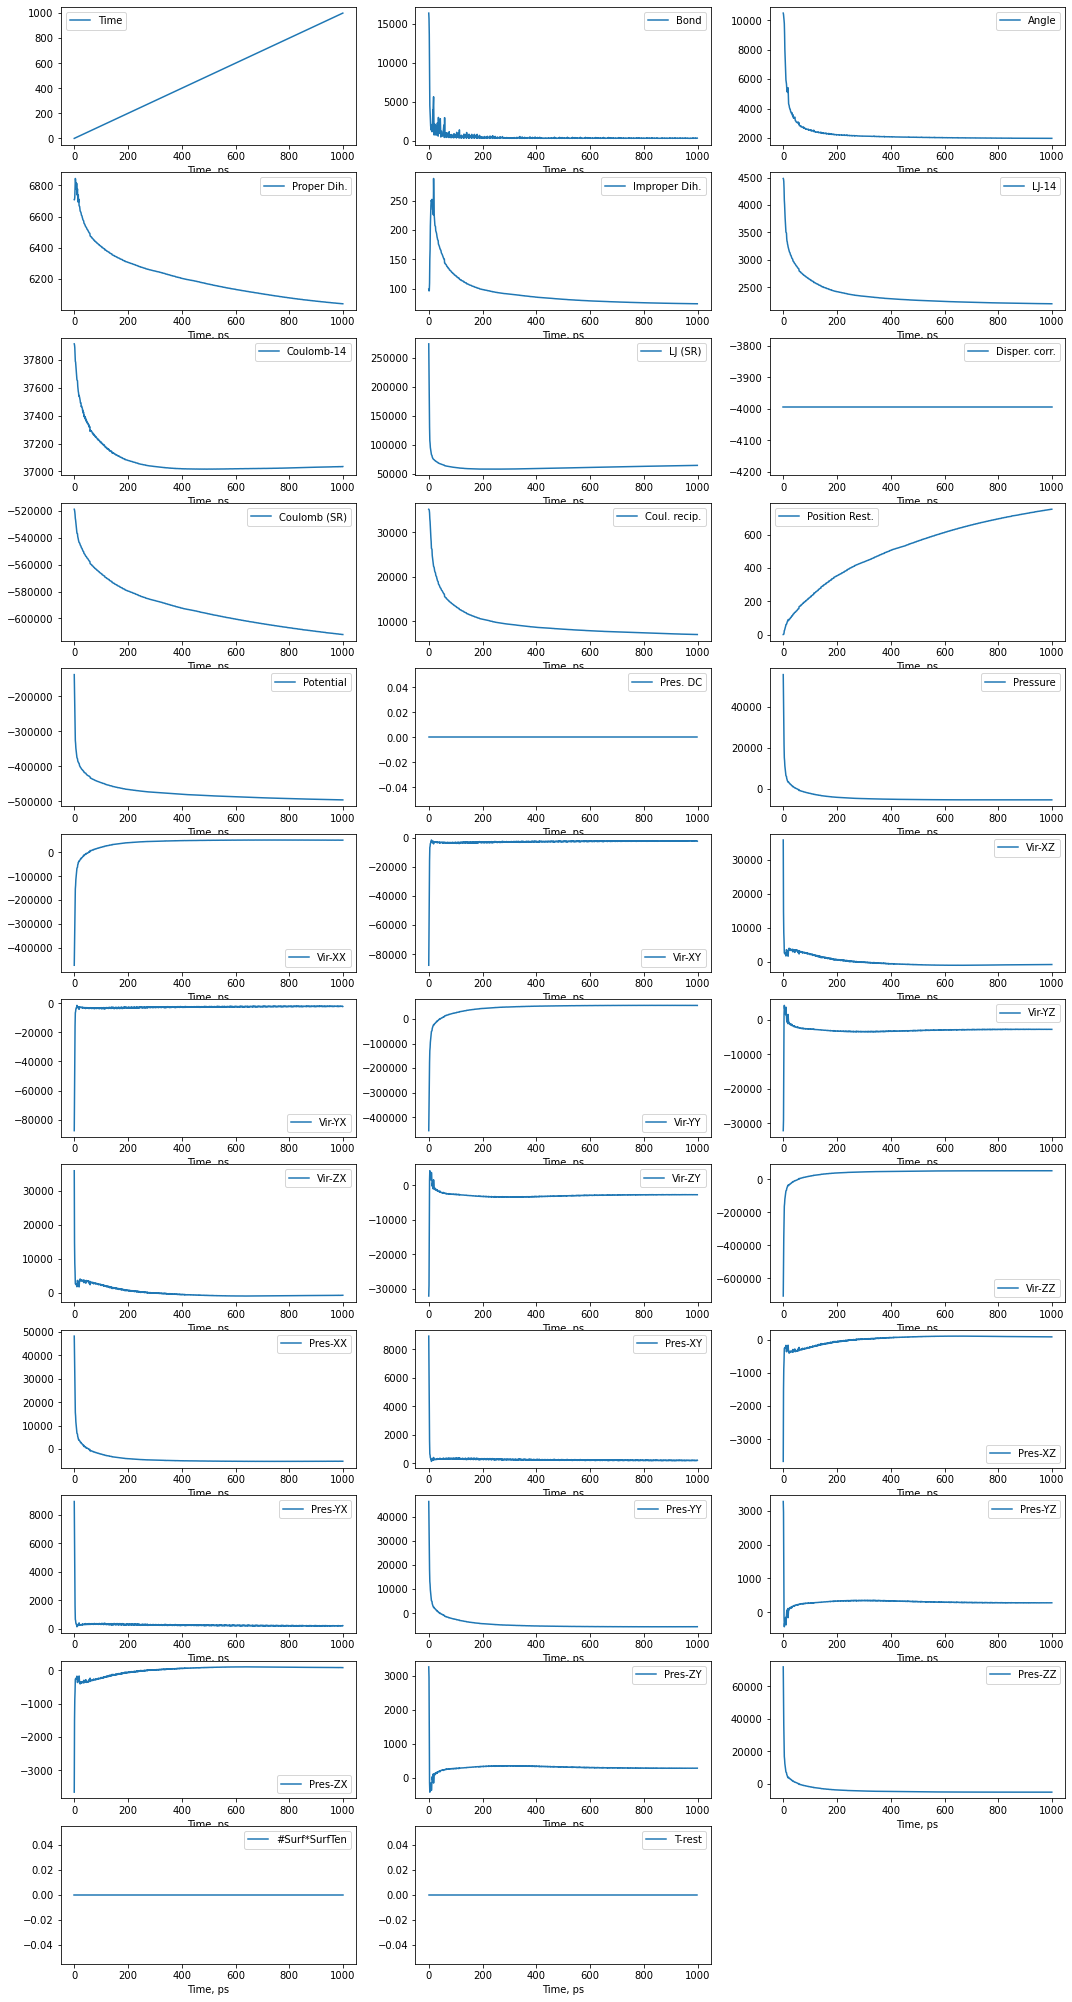

In [50]:
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('minim.edr', verbose=True)
num_of_keys=len(df.keys())
grid=[1+num_of_keys//3,3]

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key][0:1000],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()

## Equilibration 1: NPT Berendsen, 100 ps with positional restraints of 1000 kJ/mol/A^2 on heavy atoms

In [55]:
%%bash
cat << __EOF__ > equil1.mdp
;MDP-file for equilibraion: fist step 100 ps with 500 kJ/mol/A2 constraints on heavy atoms of protein and with timestep of 0.5 fs.

; VARIOUS PREPROCESSING OPTIONS
include                  = 
define                   = -DPOSRES ; will trigger the inclusion of posre.itp into your topology, used for implementing position restraints.
; here we assume that in posres.itp file all force constants have been changed to POSRES_FC

; RUN CONTROL PARAMETERS
integrator               = md ; Steepest descent integrator
nsteps                   = 100000 ;  steps
init-step                = 0 ; For exact run continuation or redoing part of a run
simulation-part          = 1 ; Part index is updated automatically on checkpointing (keeps files separate)
comm-mode                = Linear ; mode for center of mass motion removal

nstcomm                  = 100 ; number of steps for center of mass motion removal
comm-grps                =  System ; group(s) for center of mass motion removal default is the whole system;

dt                      = 0.001 ; this is only for MD

; OUTPUT CONTROL OPTIONS
; Output frequency for coords (x), velocities (v) and forces (f)
nstxout                  = 0
nstvout                  = 0
nstfout                  = 0
; Output frequency for energies to log file and energy file
nstlog                   = 1000
nstcalcenergy            = 100 ; why less???
nstenergy                = 1000

; Output frequency and precision for .xtc file
nstxout-compressed       = 1000 ; every 1 ps
compressed-x-precision   = 1000 

; This selects the subset of atoms for the compressed
; trajectory file. You can select multiple groups. By
; default, all atoms will be written.
compressed-x-grps        = 
; Selection of energy groups
energygrps               = 

; NEIGHBORSEARCHING PARAMETERS
; cut-off scheme (Verlet: particle based cut-offs, group: using charge groups)
cutoff-scheme            = Verlet
; nblist update frequency
nstlist                  = 10
; ns algorithm (simple or grid)
ns-type                  = Grid
; Periodic boundary conditions: xyz, no, xy
pbc                      = xyz
periodic-molecules       = no
; Allowed energy error due to the Verlet buffer in kJ/mol/ps per atom,
; a value of -1 means: use rlist
verlet-buffer-tolerance  = 0.005
; nblist cut-off        
rlist                    = 1.2 ; actually will be ignore and calculated from verlet-buffer-tolerance

; OPTIONS FOR ELECTROSTATICS AND VDW
; Method for doing electrostatics
coulombtype              = PME
coulomb-modifier         = None ; change from default Potential-shift-Verlet because Amber does not use shift.
rcoulomb-switch          = 0
rcoulomb                 = 0.8
; Relative dielectric constant for the medium and the reaction field
epsilon-r                = 1
epsilon-rf               = 0
; Method for doing Van der Waals
vdwtype                  = Cut-off
vdw-modifier             = None ; this matches Amber
; cut-off lengths       
rvdw_switch              = 0.8
rvdw                     = 0.8
; Apply long range dispersion corrections for Energy and Pressure
DispCorr                 = EnerPres ; This is default in AMBER, ??? AllEnerPres what is it?
; Extension of the potential lookup tables beyond the cut-off
table-extension          = 1
; Separate tables between energy group pairs
energygrp-table          = 
; Spacing for the PME/PPPM FFT grid
fourierspacing           = 0.12
; FFT grid size, when a value is 0 fourierspacing will be used
fourier-nx               = 0
fourier-ny               = 0
fourier-nz               = 0
; EWALD/PME/PPPM parameters
pme-order                = 4
ewald-rtol               = 1e-05
ewald-geometry           = 3d
epsilon-surface          = 0

; OPTIONS FOR BONDS    
constraints              = h-bonds ; this is a tweak for all-bonds to allow gromacs 2020 to calculate all non-bonded interactions on GPU
; Type of constraint algorithm
constraint_algorithm     = LINCS ; this is better than SHAKE so we retain it
; Do not constrain the start configuration
continuation             = no
; Highest order in the expansion of the constraint coupling matrix
lincs-order              = 4
; Number of iterations in the final step of LINCS. 1 is fine for
; normal simulations, but use 2 to conserve energy in NVE runs.
; For energy minimization with constraints it should be 4 to 8.
lincs-iter               = 8 ; in MD we will set this to 1
; Lincs will write a warning to the stderr if in one step a bond
; rotates over more degrees than
lincs-warnangle          = 30


; Below is only relevant for MD

; GENERATE VELOCITIES FOR STARTUP RUN
gen-vel                  = no
gen-temp                 = 300
gen-seed                 = -1


; OPTIONS FOR WEAK COUPLING ALGORITHMS
; Temperature coupling  
tcoupl                   = v-rescale
nsttcouple               = -1 ; the frequency of coupling the temperarure, -1 is automatic = nstlist for md integrator
; Groups to couple separately
tc-grps                  = System ; NOTE: Group name "System" is defined if you are NOT using an index file. But better to generate a default index file anyway.
; Time constant (ps) and reference temperature (K)
tau-t                    = 1 ; 1 ps as used in Amber paper, but we might need to research and use different for large scale dynamics!
ref-t                    = 300
; pressure coupling     
pcoupl                   = Berendsen
pcoupltype               = Isotropic
nstpcouple               = -1
; Time constant (ps), compressibility (1/bar) and reference P (bar)
tau-p                    = 1
compressibility          = 4.5e-5 ; for water
ref-p                    = 1 ; 1 bar
; Scaling of reference coordinates, No, All or COM
refcoord-scaling         = all ; The reference coordinates are scaled with the scaling matrix of the pressure coupling. 



__EOF__

In [56]:
%%bash
module load gromacs/2020.1_nompi
gmx grompp -maxwarn 1 -f equil1.mdp -c minim.gro -p topol.top \
-o equil1.tpr -v  -r init_solv_ions.pdb  -po mdout_equil1.mdp



processing topology...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:   153    Protein residues
There are:  9774      Water residues
There are:    56        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.812 nm, buffer size 0.012 nm
Set rlist, assuming 4x4 atom pair-list, to 0.800 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 60x60x60, spacing 0.115 0.115 0.115
This run will generate roughly 18 Mb of data


(Un)Loading module for modern CPU
                      :-) GROMACS - gmx grompp, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [57]:
%%bash
module load gromacs/2020.1_nompi
gmx mdrun -ntomp 2 -ntmpi 1 -deffnm equil1 #2> 1_minim.sterr 

(Un)Loading module for modern CPU
                      :-) GROMACS - gmx mdrun, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                        

In [59]:
MD=mda.Universe('equil1.tpr','equil1.xtc')
sel=MD.select_atoms('all')
a=nv.show_mdanalysis(sel,gui=False)
a.add_representation(selection='ion',repr_type='spacefill',opacity=0.9)
a.add_representation(selection='water',repr_type='spacefill',opacity=0.1)
a

NGLWidget(max_frame=100)

Last Frame read : 100, time : 100.0 ps
100 frame read in 0.02 seconds


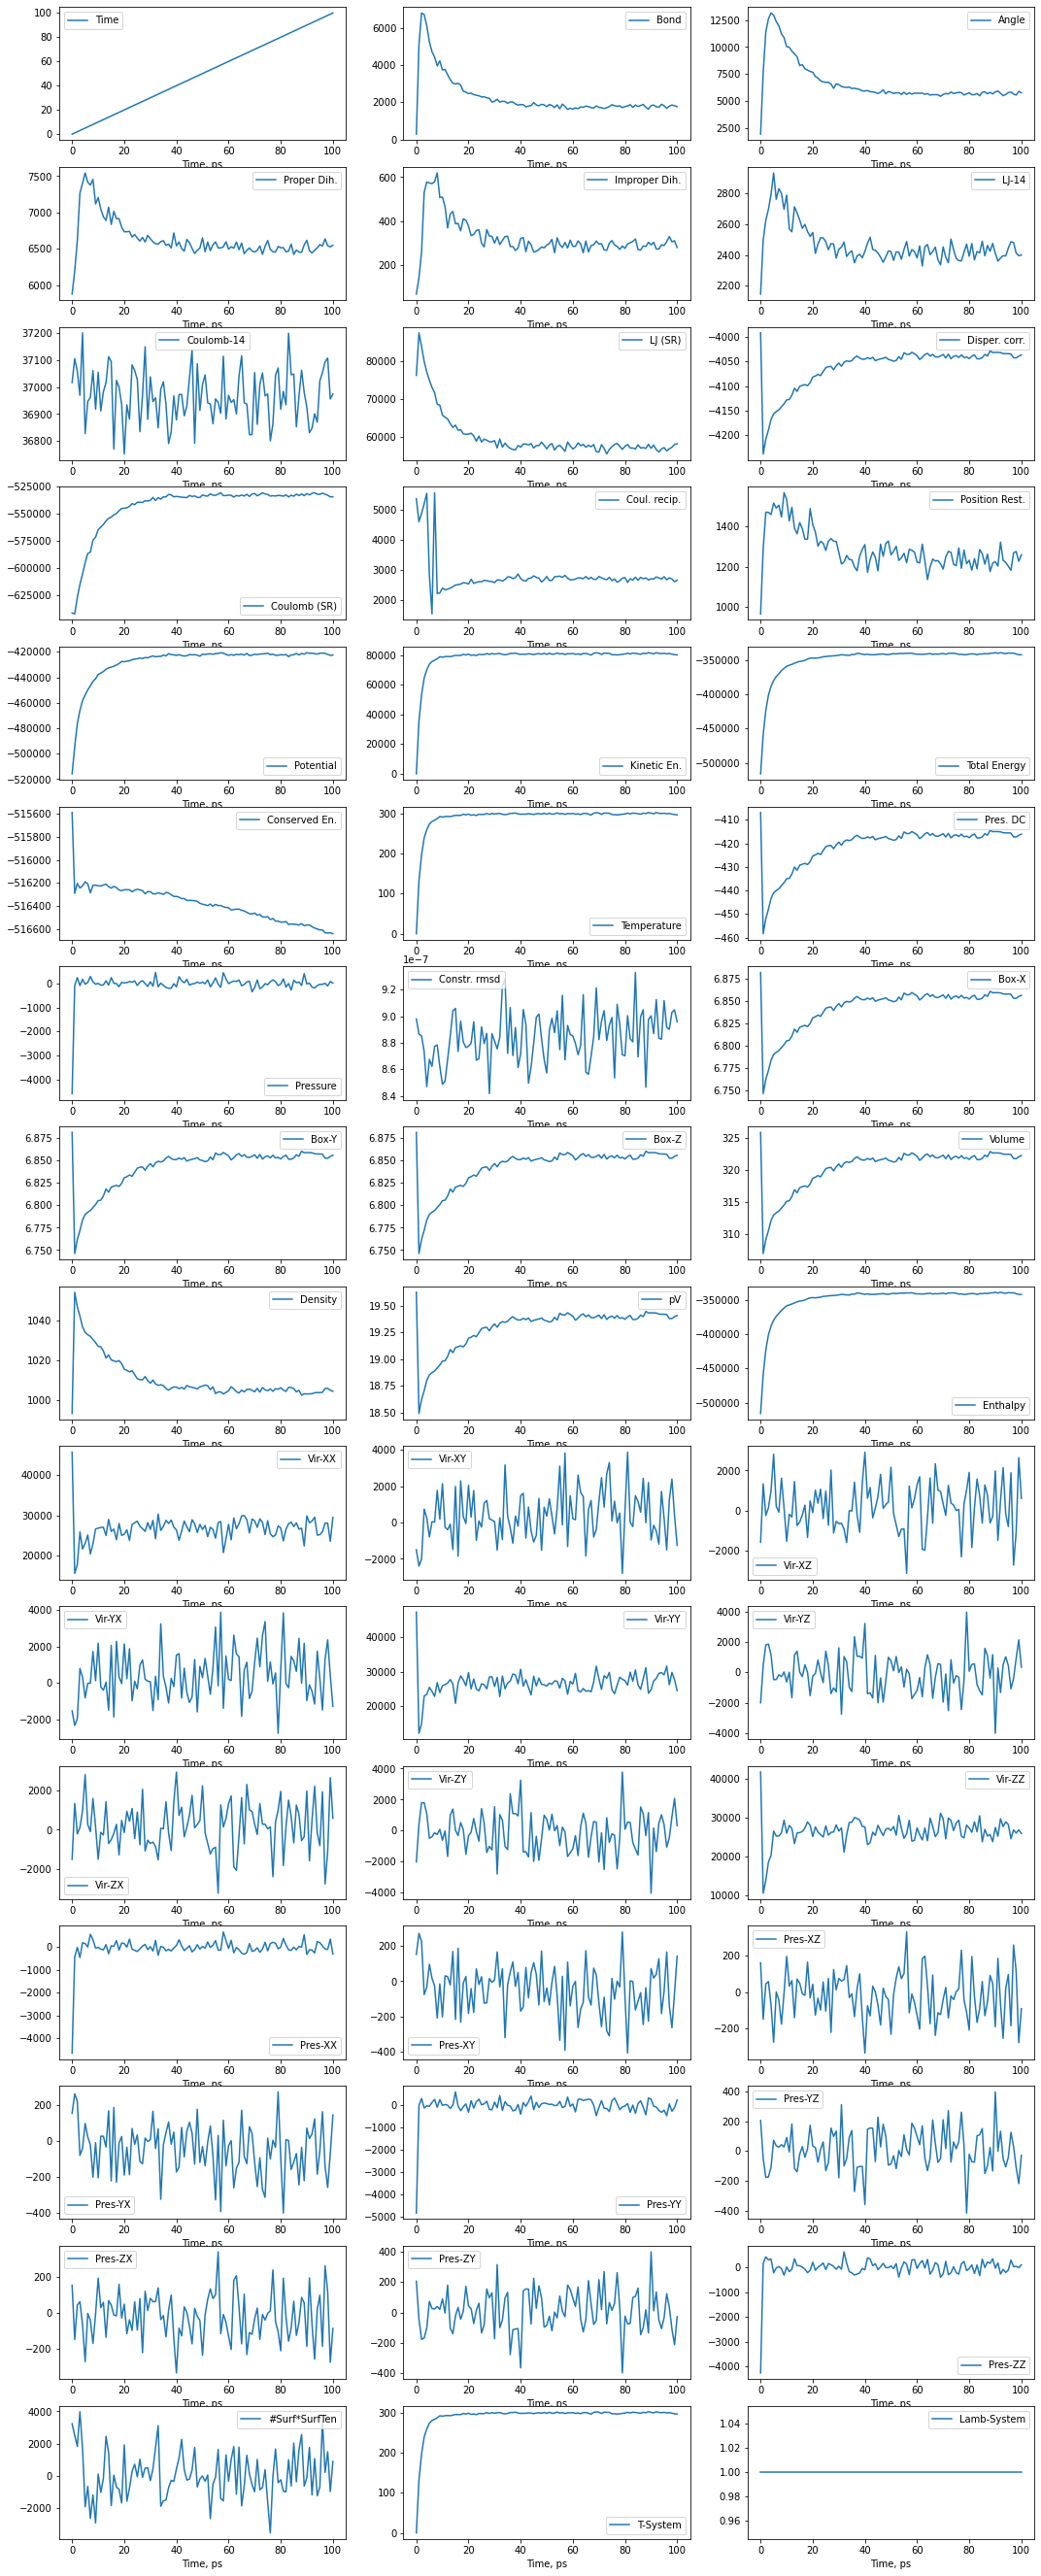

In [61]:
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('equil1.edr', verbose=True)
num_of_keys=len(df.keys())
grid=[1+num_of_keys//3,3]

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key][0:1000],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()

## Equillibration 2: NPT Berendsen, 100 ps, Parinnello-Rahman barostat, no positional restraints.

In [60]:
%%bash
cat << __EOF__ > equil2.mdp
;MDP-file for equilibraion:  200 ps with 5 kJ/mol/A2 constraints on heavy atoms of protein.

; VARIOUS PREPROCESSING OPTIONS
include                  = 


; RUN CONTROL PARAMETERS
integrator               = md ; Steepest descent integrator
nsteps                   = 100000 ; 10000 steps
init-step                = 0 ; For exact run continuation or redoing part of a run
simulation-part          = 1 ; Part index is updated automatically on checkpointing (keeps files separate)
comm-mode                = Linear ; mode for center of mass motion removal

nstcomm                  = 100 ; number of steps for center of mass motion removal
comm-grps                =  System ; group(s) for center of mass motion removal default is the whole system;

dt                      = 0.002 ; this is only for MD

; ENERGY MINIMIZATION OPTIONS
; Force tolerance and initial step-size
emtol                    = 100.0
emstep                   = 0.01

; OUTPUT CONTROL OPTIONS
; Output frequency for coords (x), velocities (v) and forces (f)
nstxout                  = 0
nstvout                  = 0
nstfout                  = 0
; Output frequency for energies to log file and energy file
nstlog                   = 1000
nstcalcenergy            = 100 ; why less???
nstenergy                = 1000

; Output frequency and precision for .xtc file
nstxout-compressed       = 5000 ; every 10 ps
compressed-x-precision   = 1000 

; This selects the subset of atoms for the compressed
; trajectory file. You can select multiple groups. By
; default, all atoms will be written.
compressed-x-grps        = 
; Selection of energy groups
energygrps               = 

; NEIGHBORSEARCHING PARAMETERS
; cut-off scheme (Verlet: particle based cut-offs, group: using charge groups)
cutoff-scheme            = Verlet
; nblist update frequency
nstlist                  = 10
; ns algorithm (simple or grid)
ns-type                  = Grid
; Periodic boundary conditions: xyz, no, xy
pbc                      = xyz
periodic-molecules       = no
; Allowed energy error due to the Verlet buffer in kJ/mol/ps per atom,
; a value of -1 means: use rlist
verlet-buffer-tolerance  = 0.005
; nblist cut-off        
rlist                    = 1.2 ; actually will be ignore and calculated from verlet-buffer-tolerance

; OPTIONS FOR ELECTROSTATICS AND VDW
; Method for doing electrostatics
coulombtype              = PME
coulomb-modifier         = None ; change from default Potential-shift-Verlet because Amber does not use shift.
rcoulomb-switch          = 0
rcoulomb                 = 0.8
; Relative dielectric constant for the medium and the reaction field
epsilon-r                = 1
epsilon-rf               = 0
; Method for doing Van der Waals
vdwtype                  = Cut-off
vdw-modifier             = None ; this matches Amber
; cut-off lengths       
rvdw_switch              = 0.8
rvdw                     = 0.8
; Apply long range dispersion corrections for Energy and Pressure
DispCorr                 = EnerPres ; This is default in AMBER, ??? AllEnerPres what is it?
; Extension of the potential lookup tables beyond the cut-off
table-extension          = 1
; Separate tables between energy group pairs
energygrp-table          = 
; Spacing for the PME/PPPM FFT grid
fourierspacing           = 0.12
; FFT grid size, when a value is 0 fourierspacing will be used
fourier-nx               = 0
fourier-ny               = 0
fourier-nz               = 0
; EWALD/PME/PPPM parameters
pme-order                = 4
ewald-rtol               = 1e-05
ewald-geometry           = 3d
epsilon-surface          = 0

; OPTIONS FOR BONDS    
constraints              = h-bonds ; this is a tweak fro all-bonds to allow gromacs 2020 to calculate all non-bonded interactions on GPU
; Type of constraint algorithm
constraint_algorithm     = LINCS ; this is better than SHAKE so we retain it
; Do not constrain the start configuration
continuation             = no
; Highest order in the expansion of the constraint coupling matrix
lincs-order              = 4
; Number of iterations in the final step of LINCS. 1 is fine for
; normal simulations, but use 2 to conserve energy in NVE runs.
; For energy minimization with constraints it should be 4 to 8.
lincs-iter               = 8 ; in MD we will set this to 1
; Lincs will write a warning to the stderr if in one step a bond
; rotates over more degrees than
lincs-warnangle          = 30


; Below is only relevant for MD

; GENERATE VELOCITIES FOR STARTUP RUN
gen-vel                  = no
gen-temp                 = 300
gen-seed                 = -1


; OPTIONS FOR WEAK COUPLING ALGORITHMS
; Temperature coupling  
tcoupl                   = v-rescale
nsttcouple               = -1 ; the frequency of coupling the temperarure, -1 is automatic = nstlist for md integrator
; Groups to couple separately
tc-grps                  = System ; NOTE: Group name "System" is defined if you are NOT using an index file. But better to generate a default index file anyway.
; Time constant (ps) and reference temperature (K)
tau-t                    = 1 ; 1 ps as used in Amber paper, but we might need to research and use different for large scale dynamics!
ref-t                    = 300
; pressure coupling     
pcoupl                   = Parrinello-Rahman
pcoupltype               = Isotropic
nstpcouple               = -1
; Time constant (ps), compressibility (1/bar) and reference P (bar)
tau-p                    = 1
compressibility          = 4.5e-5 ; for water
ref-p                    = 1 ; 1 bar
; Scaling of reference coordinates, No, All or COM
refcoord-scaling         = all ; The reference coordinates are scaled with the scaling matrix of the pressure coupling. 


__EOF__

In [62]:
%%bash
module load gromacs/2020.1_nompi
gmx grompp -maxwarn 1 -f equil2.mdp -c equil1.gro -p topol.top \
-o equil2.tpr -v  -r init_solv_ions.pdb  -po mdout_equil2.mdp



processing topology...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:   153    Protein residues
There are:  9774      Water residues
There are:    56        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.835 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 0.800 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 60x60x60, spacing 0.114 0.114 0.114
This run will generate roughly 6 Mb of data


(Un)Loading module for modern CPU
                      :-) GROMACS - gmx grompp, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [65]:
%%bash
module load gromacs/2020.1_nompi
gmx mdrun -ntomp 2 -ntmpi 1 -deffnm equil2 #2> 1_minim.sterr 

(Un)Loading module for modern CPU
                      :-) GROMACS - gmx mdrun, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                        

In [66]:
MD=mda.Universe('equil2.tpr','equil2.xtc')
sel=MD.select_atoms('all')
a=nv.show_mdanalysis(sel,gui=False)
a.add_representation(selection='ion',repr_type='spacefill',opacity=0.9)
a.add_representation(selection='water',repr_type='spacefill',opacity=0.1)
a

Exception ignored in: <function ReaderBase.__del__ at 0x7f0602ca0a60>
Traceback (most recent call last):
  File "/opt/miniconda3/envs/mol_model_course/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py", line 2152, in __del__
    self.close()
  File "/opt/miniconda3/envs/mol_model_course/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py", line 179, in close
    self._xdr.close()
AttributeError: 'XTCReader' object has no attribute '_xdr'


NGLWidget(max_frame=20)

Last Frame read : 100, time : 200.0 ps
100 frame read in 0.02 seconds


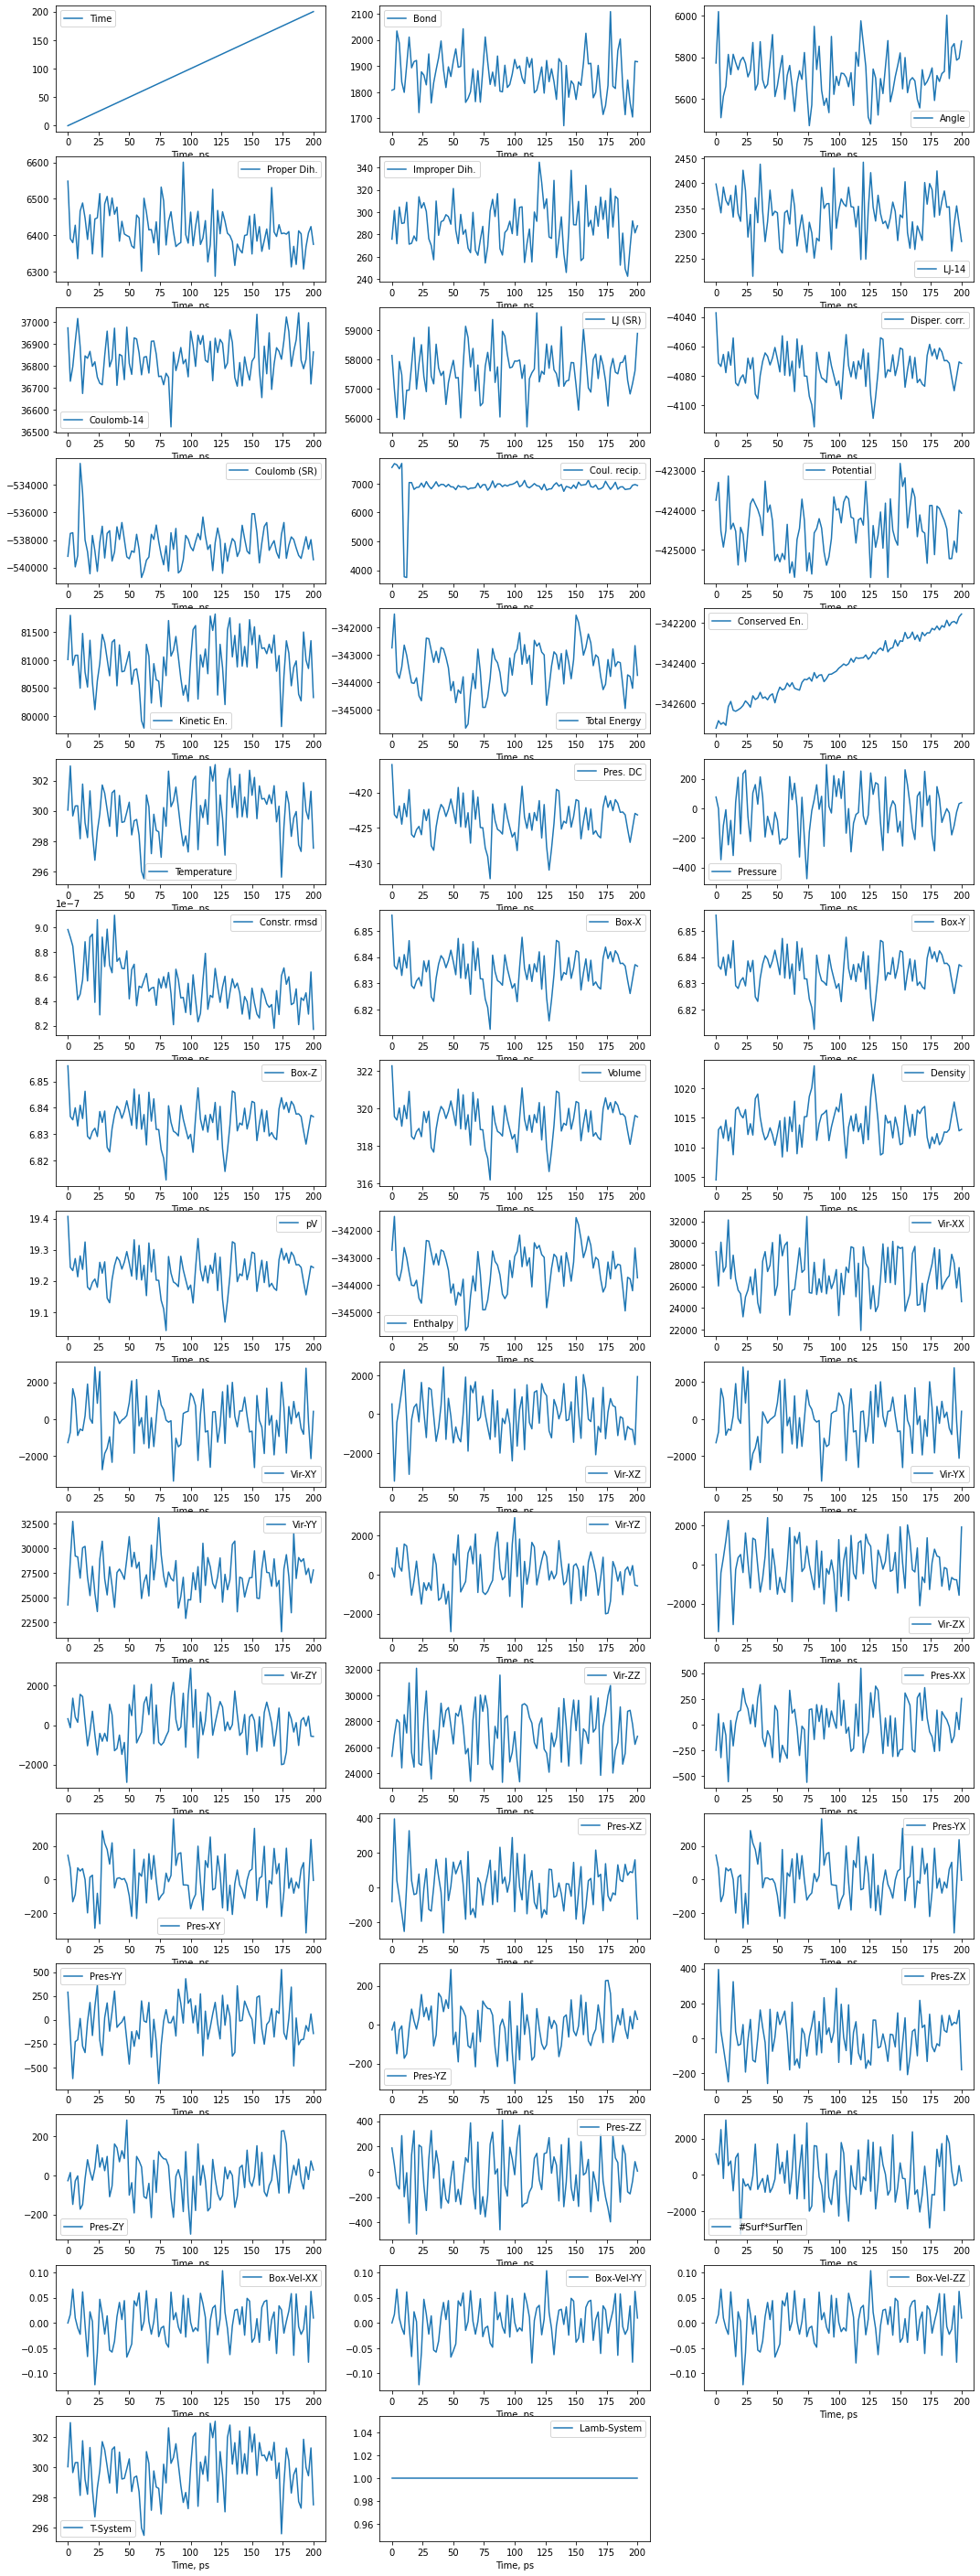

In [67]:
import panedr
import matplotlib.pyplot as plt
df = panedr.edr_to_df('equil2.edr', verbose=True)
num_of_keys=len(df.keys())
grid=[1+num_of_keys//3,3]

plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.plot(df[key][0:1000],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()

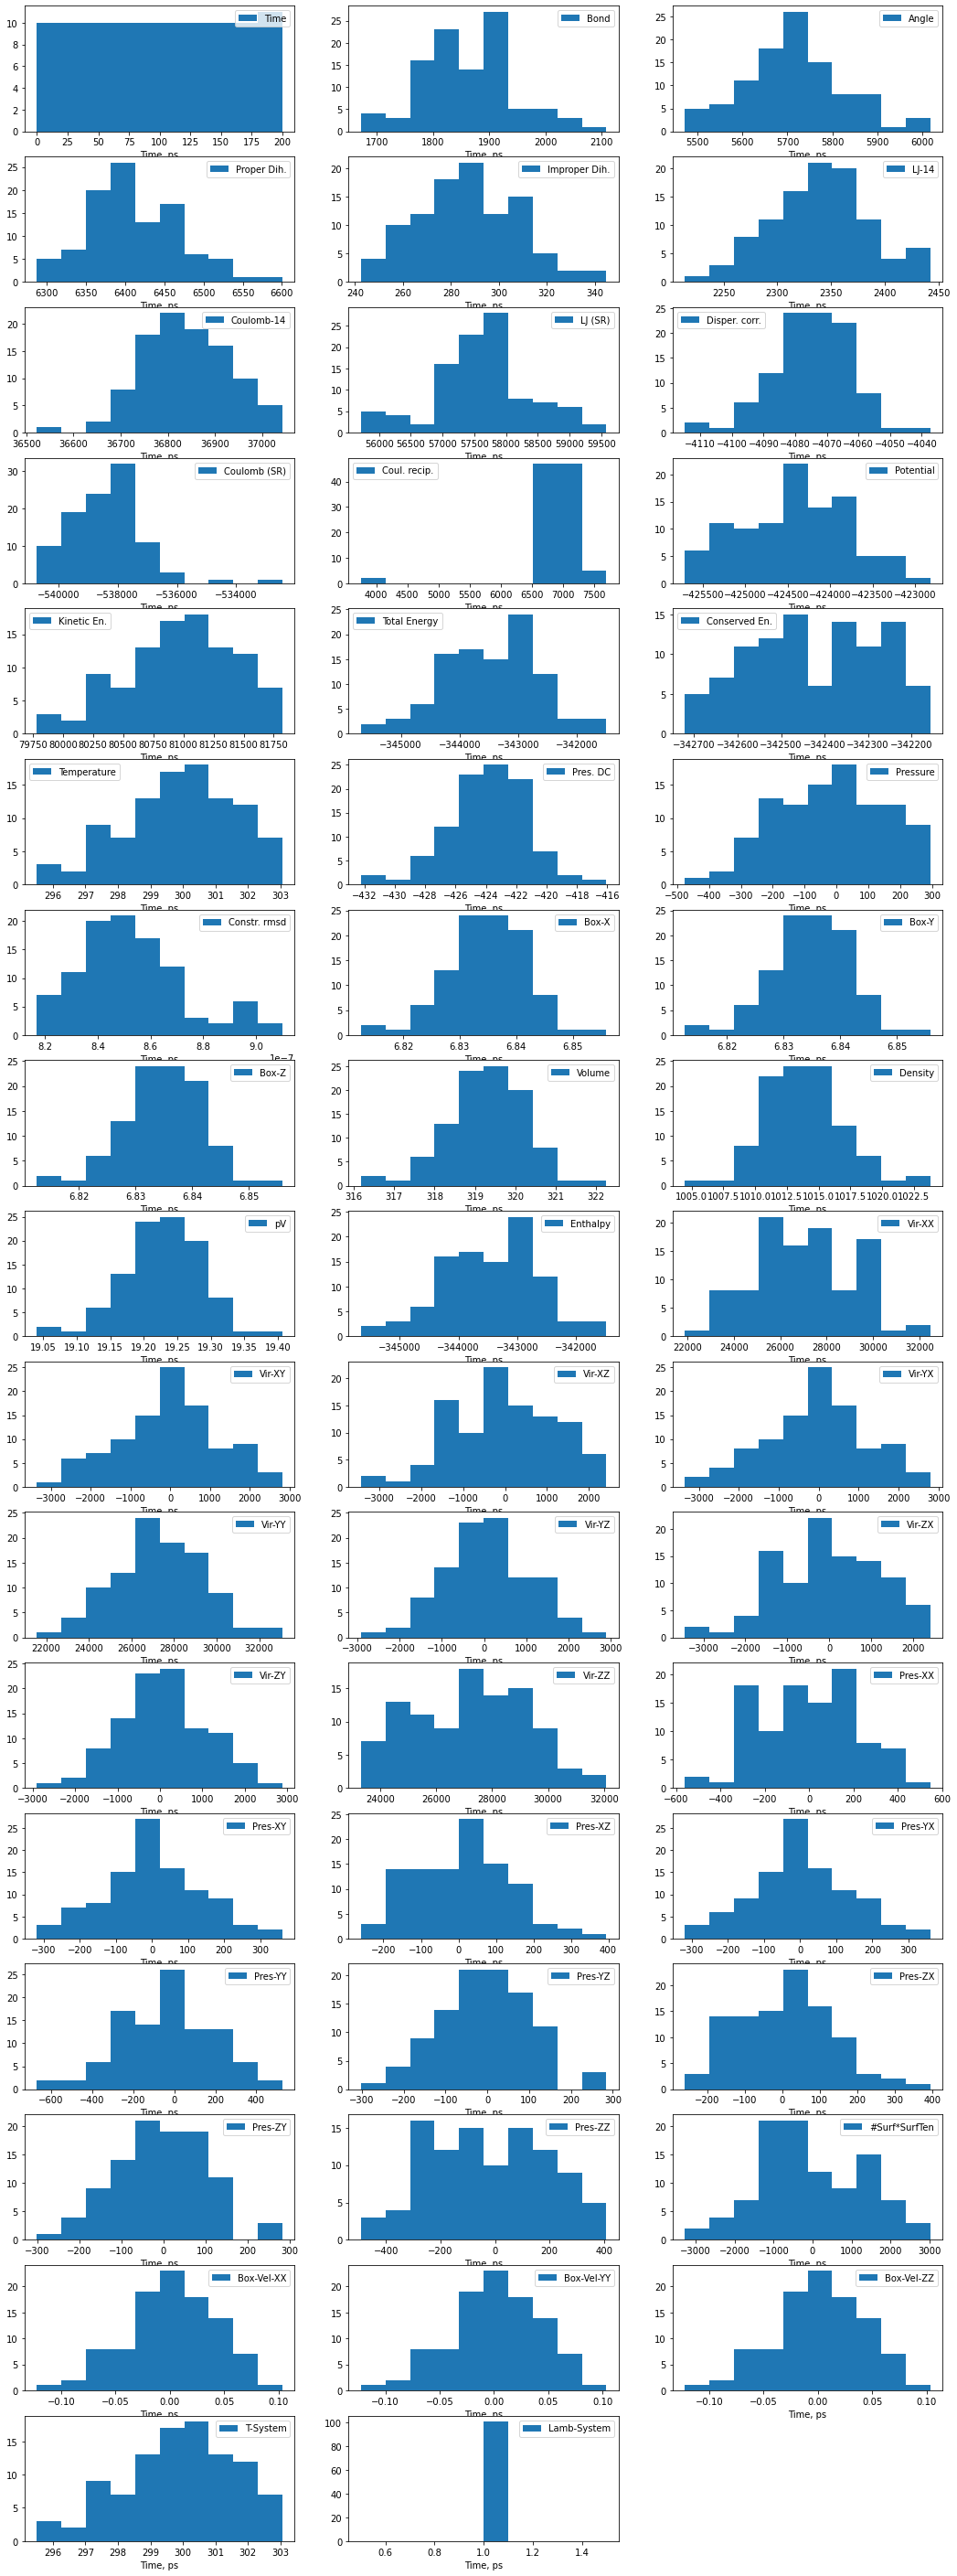

In [68]:
plt.figure(figsize=(grid[1]*6,grid[0]*3))
plt.title('Mod')
for i,key in enumerate(df.keys(),1):
    ax=plt.subplot(*grid, i)
    ax.hist(df[key][0:1000],label=key)
    ax.set_xlabel('Time, ps')
    ax.legend()    
plt.show()

## Production run

In [69]:
%%bash
cat << __EOF__ > prod.mdp
;MDP-file production run: 10 000 ns.
; this protocol now generates velocities this is useful for generating parallel runs with different random seeds
; random seeds are selected randomly by grompp here

; VARIOUS PREPROCESSING OPTIONS
include                  = 
define                   = ; NO RESTRAINTS DEFINED HERE


; RUN CONTROL PARAMETERS
integrator               = md ; Steepest descent integrator
nsteps                   = 500000 ; 500 000 = 1 nanosecond
init-step                = 0 ; For exact run continuation or redoing part of a run
simulation-part          = 1 ; Part index is updated automatically on checkpointing (keeps files separate)
comm-mode                = Linear ; mode for center of mass motion removal

nstcomm                  = 100 ; number of steps for center of mass motion removal
comm-grps                =  System ; group(s) for center of mass motion removal default is the whole system;

dt                      = 0.002 ; this is only for MD

; ENERGY MINIMIZATION OPTIONS
; Force tolerance and initial step-size
emtol                    = 100.0
emstep                   = 0.01

; OUTPUT CONTROL OPTIONS
; Output frequency for coords (x), velocities (v) and forces (f)
nstxout                  = 0
nstvout                  = 0
nstfout                  = 0
; Output frequency for energies to log file and energy file
nstlog                   = 1000
nstcalcenergy            = 100 ; why less -> looks like this is needed for thermostats/barostats
nstenergy                = 1000

; Output frequency and precision for .xtc file
nstxout-compressed       = 5000 ; every 10 ps 
compressed-x-precision   = 1000 

; This selects the subset of atoms for the compressed
; trajectory file. You can select multiple groups. By
; default, all atoms will be written.
compressed-x-grps        = 
; Selection of energy groups
energygrps               = 

; NEIGHBORSEARCHING PARAMETERS
; cut-off scheme (Verlet: particle based cut-offs, group: using charge groups)
cutoff-scheme            = Verlet
; nblist update frequency
nstlist                  = 10
; ns algorithm (simple or grid)
ns-type                  = Grid
; Periodic boundary conditions: xyz, no, xy
pbc                      = xyz
periodic-molecules       = no
; Allowed energy error due to the Verlet buffer in kJ/mol/ps per atom,
; a value of -1 means: use rlist
verlet-buffer-tolerance  = 0.005
; nblist cut-off        
rlist                    = 1.2 ; actually will be ignore and calculated from verlet-buffer-tolerance

; OPTIONS FOR ELECTROSTATICS AND VDW
; Method for doing electrostatics
coulombtype              = PME
coulomb-modifier         = None ; change from default Potential-shift-Verlet because Amber does not use shift.
rcoulomb-switch          = 0
rcoulomb                 = 0.8
; Relative dielectric constant for the medium and the reaction field
epsilon-r                = 1
epsilon-rf               = 0
; Method for doing Van der Waals
vdwtype                  = Cut-off
vdw-modifier             = None ; this matches Amber
; cut-off lengths       
rvdw_switch              = 0.8
rvdw                     = 0.8
; Apply long range dispersion corrections for Energy and Pressure
DispCorr                 = EnerPres ; This is default in AMBER, ??? AllEnerPres what is it?
; Extension of the potential lookup tables beyond the cut-off
table-extension          = 1
; Separate tables between energy group pairs
energygrp-table          = 
; Spacing for the PME/PPPM FFT grid
fourierspacing           = 0.12
; FFT grid size, when a value is 0 fourierspacing will be used
fourier-nx               = 0
fourier-ny               = 0
fourier-nz               = 0
; EWALD/PME/PPPM parameters
pme-order                = 4
ewald-rtol               = 1e-05
ewald-geometry           = 3d
epsilon-surface          = 0

; OPTIONS FOR BONDS    
constraints              = h-bonds ; this is a tweak fro all-bonds to allow gromacs 2020 to calculate all non-bonded interactions on GPU
; Type of constraint algorithm
constraint_algorithm     = LINCS ; this is better than SHAKE so we retain it
; Do not constrain the start configuration
continuation             = no
; Highest order in the expansion of the constraint coupling matrix
lincs-order              = 4
; Number of iterations in the final step of LINCS. 1 is fine for
; normal simulations, but use 2 to conserve energy in NVE runs.
; For energy minimization with constraints it should be 4 to 8.
lincs-iter               = 1 ; in MD we will set this to 1
; Lincs will write a warning to the stderr if in one step a bond
; rotates over more degrees than
lincs-warnangle          = 30


; Below is only relevant for MD

; GENERATE VELOCITIES FOR STARTUP RUN
gen-vel                  = yes
gen-temp                 = 300
gen-seed                 = -1


; OPTIONS FOR WEAK COUPLING ALGORITHMS
; Temperature coupling  
tcoupl                   = v-rescale
nsttcouple               = -1 ; the frequency of coupling the temperarure, -1 is automatic = nstlist for md integrator
; Groups to couple separately
tc-grps                  = System ; NOTE: Group name "System" is defined if you are NOT using an index file. But better to generate a default index file anyway.
; Time constant (ps) and reference temperature (K)
tau-t                    = 1 ; 1 ps as used in Amber paper, but we might need to research and use different for large scale dynamics!
ref-t                    = 300
; pressure coupling     
pcoupl                   = Parrinello-Rahman
pcoupltype               = Isotropic
nstpcouple               = -1
; Time constant (ps), compressibility (1/bar) and reference P (bar)
tau-p                    = 1
compressibility          = 4.5e-5 ; for water
ref-p                    = 1 ; 1 bar
; Scaling of reference coordinates, No, All or COM
refcoord-scaling         = all ; The reference coordinates are scaled with the scaling matrix of the pressure coupling. 
; ??? check if com is better?




__EOF__

In [70]:
%%bash
module load gromacs/2020.1_nompi
gmx grompp -maxwarn 1 -f prod.mdp -c equil2.gro -p topol.top \
-o prod.tpr -v  -r init_solv_ions.pdb  -po mdout_prod.mdp

processing topology...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:   153    Protein residues
There are:  9774      Water residues
There are:    56        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.835 nm, buffer size 0.035 nm
Set rlist, assuming 4x4 atom pair-list, to 0.800 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 60x60x60, spacing 0.114 0.114 0.114
This run will generate roughly 20 Mb of data


(Un)Loading module for modern CPU
                      :-) GROMACS - gmx grompp, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                       

In [71]:
%%bash
module load gromacs/2020.1_nompi
gmx mdrun -ntomp 2 -ntmpi 1 -deffnm prod #2> 1_minim.sterr 

(Un)Loading module for modern CPU
                      :-) GROMACS - gmx mdrun, 2020.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                        

In [73]:
MD=mda.Universe('prod.tpr','prod.xtc')
sel=MD.select_atoms('all')
a=nv.show_mdanalysis(sel,gui=False)
#a.add_representation(selection='ion',repr_type='spacefill',opacity=0.9)
#a.add_representation(selection='water',repr_type='spacefill',opacity=0.1)
a

NGLWidget(max_frame=100)